# Import Required libraries 

In [24]:
#===============================Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import cv2 as cv
import os 
import sys

#====================this libraries for the models =============
from sklearn.tree import DecisionTreeClassifier

#========== This libraries for getting the result of accurcy and confusion matrix of the model =======
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

#======================= Avoiding warnings messages===============
import warnings
warnings.filterwarnings('ignore')

#============== Splitting the data into training and validation =========
from sklearn.model_selection import train_test_split

#============= This library used for saved the model =================
import pickle



# Reading the data form the file 

In [2]:
# path of the data 
path="/Users/samaheralghanmi/Documents/GitHub/ML_Coursework/dataset/"

#read the csv file that contian the images name and its label 
train=pd.read_csv(path+ '/label.csv')

#store the images name in (image_name )
image_name=train['file_name'].to_list()
#store the labels of the images in (label_name ), which tell us the type of tumors 
label_name=train['label'].to_list()

#Print an example for the array 
#print("this image is", image_name[0] , label_name[0])


train_labels = [] # Y trian store the informantion that 'if there a tumor or not ' 

#len(label_name)--> number of the data set that we have 
#this for loop will check on all the labal name list 
#and it will seprate the data into two class 0 and 1
#0 means (no_tumor), 1 means (have tumor) this will store in train_labels 
for i in range(len(label_name)):
    if label_name[i] == 'no_tumor':
        train_labels.append(0)
    else:
        train_labels.append(1)

#Print an examples for the two classes 
        
print("this image is", image_name[0] , label_name[0], "in Class: ", train_labels[0])
print("this image is", image_name[1] , label_name[1], "in Class: ", train_labels[1])

this image is IMAGE_0000.jpg meningioma_tumor in Class:  1
this image is IMAGE_0001.jpg no_tumor in Class:  0


this image is IMAGE_0025.jpg pituitary_tumor in Class:  1


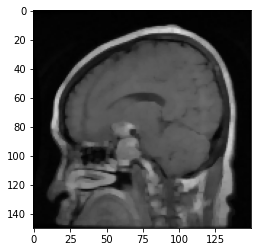

In [3]:
#Now I will read the file of the images and resize the images 
#then I will convert the images to array using np 

train_img = [] # X trian 

img_size= 150 # for using in image resize  


# =========== Reading the preproccing images and resize it then convert it to an array ======
# =========== change the file path as its apear in your computer ================
for i in range(len(image_name)):
    train_img.append(cv.resize(cv.imread(path+"/New_images/"+image_name[i]),(img_size,img_size)))


train_img = np.array(train_img)

#Example of one image after resizing 
print("this image is", image_name[25] , label_name[25], "in Class: ", train_labels[25])
plt.imshow(train_img[25])


In [4]:
# here we can see how many data set in each class 
np.unique(train_labels)
pd.Series(train_labels).value_counts()


1    2546
0     454
dtype: int64

In [5]:
# here we can see the shape of the train image
print ("Shape of the train image: " )
train_img.shape


Shape of the train image: 


(3000, 150, 150, 3)

# Data Visualization

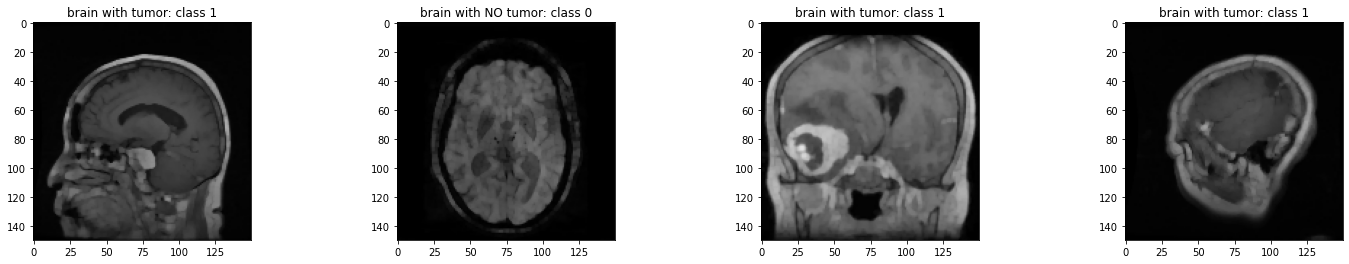

In [6]:
#============== This funcion used for plotting the images from each class=============

def Data_Visualization():
    c =0

    fig, subplots = plt.subplots(1, 4)
    fig.set_size_inches(25, 4)
    for j in range(len(train_labels)):
        if(c<4):
            if train_labels[j] == 0:
                subplots[j].imshow(train_img[j], cmap="gray")
                subplots[j].set_title("brain with NO tumor: class 0")
            elif train_labels[j] == 1:
                subplots[j].imshow(train_img[j], cmap="gray")
                subplots[j].set_title("brain with tumor: class 1")
        c=c+1


    return plt.show()

#=============== Plotting the images ==================
Data_Visualization()

# Split the data 

In [7]:
# ================== reshape the images list ===============
train_img = np.array(train_img).reshape(3000, -1)

# ================== Split the data =======================
X_train,X_t,y_train,y_t=train_test_split(train_img,train_labels,test_size=0.20,random_state=10) 
print (len(X_t), len(y_t), len(X_train), len(y_train))

print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(train_img)),3),round((len(y_t)*1.0)/len(train_img),3)))

600 600 2400 2400
train set: 0.8  | test set: 0.2


# Classification using Decision Tree

In [10]:
#==== Search for best value of hyper-prameters (max_features, max_depth) =====

acc_test_22 = []
max_features_11 = []
max_depth_11 = []
for max_features_1 in range (10,30):  #=== First varible range ===
    for max_depth_1 in range ( 10, 30):  #=== Second varible range ===
        print (max_depth_1, max_features_1)
        classifier = DecisionTreeClassifier(max_features=max_features_1, max_depth=max_depth_1, random_state=0)
        classifier.fit(X_train, y_train)
        pred_y = classifier.predict(X_t)
        acc_test_2 = accuracy_score(y_t,pred_y)
        acc_test_22.append (acc_test_2)
        print (acc_test_2)
        max_features_11.append (max_features_1)
        max_depth_11.append (max_depth_1)
#===
max_value = max(acc_test_22)        
max_index = acc_test_22.index(max_value)
print(max_index)
max_depth_1=max_depth_11[max_index]
max_features_1=max_features_11[max_index]

#========== Print Best Hyper- parameter 
print('max_depth_1',max_depth_1)
print('max_features_1',max_features_1)

10 10
0.9483333333333334
11 10
0.93
12 10
0.925
13 10
0.925
14 10
0.9416666666666667
15 10
0.9383333333333334
16 10
0.945
17 10
0.945
18 10
0.945
19 10
0.945
20 10
0.945
21 10
0.945
22 10
0.945
23 10
0.945
24 10
0.945
25 10
0.945
26 10
0.945
27 10
0.945
28 10
0.945
29 10
0.945
10 11
0.9316666666666666
11 11
0.9333333333333333
12 11
0.93
13 11
0.94
14 11
0.9283333333333333
15 11
0.9316666666666666
16 11
0.9216666666666666
17 11
0.9283333333333333
18 11
0.9416666666666667
19 11
0.9416666666666667
20 11
0.9416666666666667
21 11
0.9416666666666667
22 11
0.9416666666666667
23 11
0.9416666666666667
24 11
0.9416666666666667
25 11
0.9416666666666667
26 11
0.9416666666666667
27 11
0.9416666666666667
28 11
0.9416666666666667
29 11
0.9416666666666667
10 12
0.9366666666666666
11 12
0.93
12 12
0.93
13 12
0.93
14 12
0.935
15 12
0.9333333333333333
16 12
0.94
17 12
0.9333333333333333
18 12
0.9333333333333333
19 12
0.9333333333333333
20 12
0.9333333333333333
21 12
0.9333333333333333
22 12
0.93333333333

In [11]:
# if you skip the previos step you can make these values equal to:
# max_depth=             and max_features= 
#max_depth_1= 17
#max_features_1= 15
#print best accurcy test accourding to the previos for loop 
classifier = DecisionTreeClassifier(max_features=max_features_1, max_depth=max_depth_1, random_state=0)

# Fit the model 
classifier.fit(X_train, y_train)

#Predect the model 
pred_y = classifier.predict(X_t)
# Accurcy test 
acc_test_2 = accuracy_score(y_t,pred_y)
print ("Accurcy test: ",acc_test_2)


Accurcy test:  0.9616666666666667


In [20]:
# this code for printing the result 
# precision    recall  f1-score
y_t = np.asarray (y_t)
y_train = np.asarray (y_train)
y_true=np.argmax(y_t)
cm = confusion_matrix(y_t, pred_y)
#print (cm)

#printing the Classificarion Report: 
print(classification_report(y_t, pred_y))

precision = precision_score(y_t, pred_y, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_t, pred_y, average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_t, pred_y, average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU

print ('IoU:', jaccard_score(y_t, pred_y, average='micro'))

y_pred= classifier.predict(X_t)
print("Accuracy_test:",accuracy_score(y_t, y_pred))
#====
y_pred1= classifier.predict(X_train)
print("Accuracy_train:",accuracy_score(y_train, y_pred1))
#=====

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        87
           1       0.97      0.98      0.98       513

    accuracy                           0.96       600
   macro avg       0.93      0.92      0.92       600
weighted avg       0.96      0.96      0.96       600

Precision: 0.961197
Recall: 0.961667
F1 score: 0.961386
IoU: 0.9261637239165329
Accuracy_test: 0.9616666666666667
Accuracy_train: 0.9995833333333334


In [21]:
# Now, this code will print the confusion matrix of our results
# with normlization, and without normilazation 
class_names = ['No Tumor', 'Tumor']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion Matrix, without Normalization


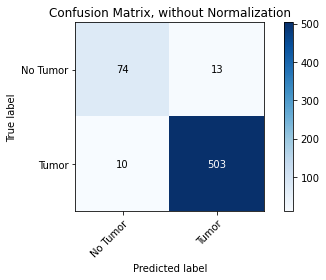

Normalized Confusion Matrix


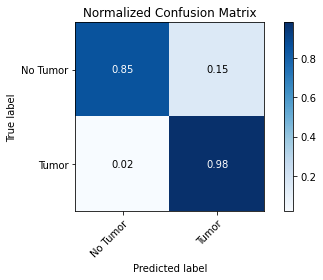

In [22]:
#======Print the matrix============

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14}

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_t, pred_y, classes=class_names,
                      title='Confusion Matrix, without Normalization')
plt.savefig('confusion matrix22'+'Brain Tumor1'+'.png')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_t, pred_y, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.savefig('Confusion Matrix'+'RF' +'.png')
plt.show()

In [25]:
#=============Save the model==========
filename = 'DTree_model_Task1.sav'
pickle.dump(classifier, open(filename, 'wb'))